<a href="https://colab.research.google.com/github/rajatsaxena/Ephys/blob/master/pca_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
# Define a simple neural network
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu', name='penultimate_layer'),  # Penultimate layer
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Function to filter dataset by classes
def filter_by_classes(x, y, classes):
    mask = np.isin(y, classes)
    return x[mask], y[mask]

In [7]:
# Filter datasets
x_train_2classes, y_train_2classes = filter_by_classes(x_train, y_train, [0, 1])
x_test_2classes, y_test_2classes = filter_by_classes(x_test, y_test, [0, 1])

x_train_4classes, y_train_4classes = filter_by_classes(x_train, y_train, [0, 1, 2, 3])
x_test_4classes, y_test_4classes = filter_by_classes(x_test, y_test, [0, 1, 2, 3])

x_train_6classes, y_train_6classes = filter_by_classes(x_train, y_train, [0, 1, 2, 3, 4, 5])
x_test_6classes, y_test_6classes = filter_by_classes(x_test, y_test, [0, 1, 2, 3, 4, 5])

x_train_8classes, y_train_8classes = filter_by_classes(x_train, y_train, [0, 1, 2, 3, 4, 5, 6, 7])
x_test_8classes, y_test_8classes = filter_by_classes(x_test, y_test, [0, 1, 2, 3, 4, 5, 6, 7])

x_train_10classes, y_train_10classes = filter_by_classes(x_train, y_train, range(10))
x_test_10classes, y_test_10classes = filter_by_classes(x_test, y_test, range(10))

In [8]:
# Train models
model_2classes = create_model()
model_2classes.fit(x_train_2classes, y_train_2classes, epochs=5, validation_data=(x_test_2classes, y_test_2classes), verbose=1)

model_4classes = create_model()
model_4classes.fit(x_train_4classes, y_train_4classes, epochs=5, validation_data=(x_test_4classes, y_test_4classes), verbose=1)

model_6classes = create_model()
model_6classes.fit(x_train_6classes, y_train_6classes, epochs=7, validation_data=(x_test_6classes, y_test_6classes), verbose=1)

model_8classes = create_model()
model_8classes.fit(x_train_8classes, y_train_8classes, epochs=8, validation_data=(x_test_8classes, y_test_8classes), verbose=1)

model_10classes = create_model()
model_10classes.fit(x_train_10classes, y_train_10classes, epochs=15, validation_data=(x_test_10classes, y_test_10classes), verbose=1)

Epoch 1/5
396/396 [==============================] - 2s 4ms/step - loss: 0.0377 - accuracy: 0.9939 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 2/5
396/396 [==============================] - 1s 3ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.0030 - val_accuracy: 0.9991
Epoch 3/5
396/396 [==============================] - 1s 3ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 4/5
396/396 [==============================] - 2s 4ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0015 - val_accuracy: 0.9991
Epoch 5/5
396/396 [==============================] - 2s 5ms/step - loss: 3.7356e-04 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 1/5
774/774 [==============================] - 4s 4ms/step - loss: 0.1101 - accuracy: 0.9670 - val_loss: 0.0328 - val_accuracy: 0.9887
Epoch 2/5
774/774 [==============================] - 3s 3ms/step - loss: 0.0373 - accuracy: 0.9877 - val_loss: 0.0253 - val_accuracy: 0.9918
Epoch 3/5

In [9]:
# Extract activations from the penultimate layer
from tensorflow.keras.models import Model

def get_penultimate_activations(model, data):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('penultimate_layer').output)
    return intermediate_layer_model.predict(data)

In [10]:
activations_2classes = get_penultimate_activations(model_2classes, x_test_2classes)
activations_4classes = get_penultimate_activations(model_4classes, x_test_4classes)
activations_6classes = get_penultimate_activations(model_6classes, x_test_6classes)
activations_8classes = get_penultimate_activations(model_8classes, x_test_8classes)
activations_10classes = get_penultimate_activations(model_10classes, x_test_10classes)

313/313 [==============================] - 0s 1ms/step


In [16]:
# Perform PCA on the activations
def plot_scree(activations, title):
    pca = PCA()
    pca.fit(activations)
    explained_variance = pca.explained_variance_ratio_

    plt.plot(np.cumsum(explained_variance), label=title)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')

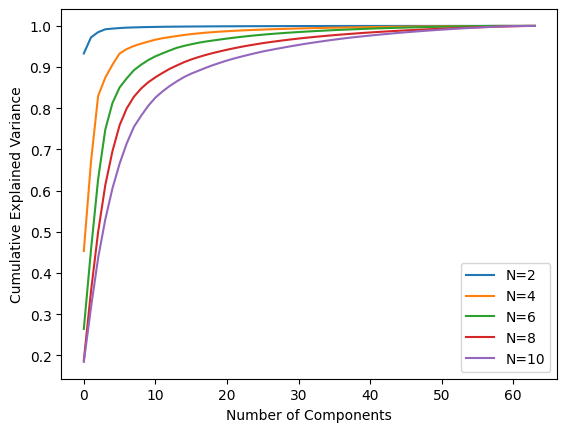

In [17]:
plt.figure()
plot_scree(activations_2classes, 'N=2')
plot_scree(activations_4classes, 'N=4')
plot_scree(activations_6classes, 'N=6')
plot_scree(activations_8classes, 'N=8')
plot_scree(activations_10classes, 'N=10')
plt.legend()
plt.show()